### 1.Setting up opencv

In [ ]:
!pip install opencv-python

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.8 MB/s eta 0:00:00


Saving image.png to image (1).png
2/2 [==============================] - 0s 36ms/step


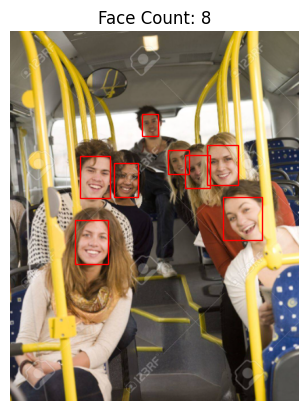

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from mtcnn.mtcnn import MTCNN
import numpy as np

# Install OpenCV if not already installed
!pip install opencv-python

# Upload the image
uploaded = files.upload()

# Assuming you uploaded a single image file, get the file name
image_path = list(uploaded.keys())[0]

# Load the image
image = Image.open(image_path)

# Convert to RGB and remove alpha channel
image = image.convert('RGB')
image_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGBA2RGB)

# Create the detector, using default weights
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(image_array)

# Count the number of detected faces
face_count = len(faces)

# Display the image with bounding boxes around faces
plt.imshow(image_array)
ax = plt.gca()

for face in faces:
    x, y, width, height = face['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.title(f'Face Count: {face_count}')
plt.axis('off')
plt.show()


### 2.Reading, Writing and Rendering of Image

Saving image.png to image (2).png
2/2 [==============================] - 0s 36ms/step


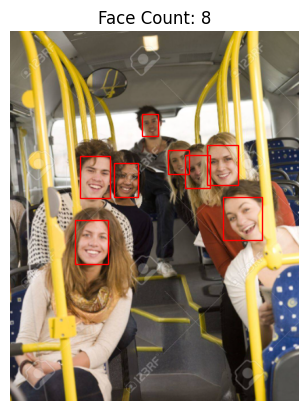

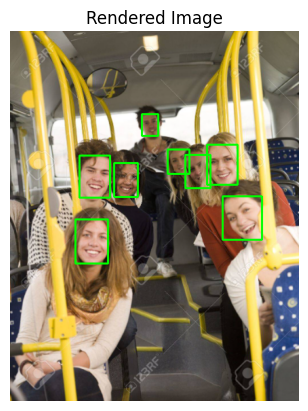

Modified image with bounding boxes saved to: path/to/your/output/modified_image.jpg


In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from mtcnn.mtcnn import MTCNN
import numpy as np

# Install OpenCV if not already installed
!pip install opencv-python

# Upload the image
uploaded = files.upload()

# Assuming you uploaded a single image file, get the file name
image_path = list(uploaded.keys())[0]

# Load the image
image = Image.open(image_path)

# Convert to RGB and remove alpha channel
image = image.convert('RGB')
image_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGBA2RGB)

# Create the detector, using default weights
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(image_array)

# Count the number of detected faces
face_count = len(faces)

# Display the original image with bounding boxes around faces
plt.imshow(image_array)
ax = plt.gca()

for face in faces:
    x, y, width, height = face['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.title(f'Face Count: {face_count}')
plt.axis('off')
plt.show()

# Perform rendering (e.g., drawing rectangles on the image)
rendered_image = image_array.copy()
for face in faces:
    x, y, width, height = face['box']
    cv2.rectangle(rendered_image, (x, y), (x+width, y+height), (0, 255, 0), 2)

# Display the rendered image
plt.imshow(rendered_image)
plt.title('Rendered Image')
plt.axis('off')
plt.show()

# Save the modified image with bounding boxes
output_image_path = 'path/to/your/output/modified_image.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(rendered_image, cv2.COLOR_RGB2BGR))
print(f"Modified image with bounding boxes saved to: {output_image_path}")


### 3.Working With Video

In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN

# Connect to the default camera (0) or specify the path to your video file
video_path = 'path/to/your/video.mp4'
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) and frame dimensions
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
output_video_path = 'path/to/your/output/processed_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Create the face detector, using default weights
detector = MTCNN()

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if no more frames are available
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces in the frame
    faces = detector.detect_faces(frame_rgb)

    # Render bounding boxes on faces
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Display the frame with bounding boxes
    cv2.imshow('Processed Video', frame)

    # Write the frame to the output video
    out.write(frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()
cv2.destroyAllWindows()


### 4. Accessing Your Web Camera

In [ ]:
from google.colab import files
import cv2
from mtcnn.mtcnn import MTCNN

# Install OpenCV if not already installed
!pip install opencv-python

# Connect to the webcam (capture device)
cap = cv2.VideoCapture(0)  # Use 0 for the default camera, or change to the appropriate index if you have multiple cameras

# Get the frames per second (fps) and frame dimensions
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
output_video_path = 'path/to/your/output/processed_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Create the detector, using default weights
detector = MTCNN()

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Break the loop if no more frames are available
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces in the frame
    faces = detector.detect_faces(frame_rgb)

    # Render bounding boxes on faces
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Display the frame with bounding boxes
    cv2.imshow('Processed Video', frame)

    # Write the frame to the output video
    out.write(frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()
cv2.destroyAllWindows()
